# Systemas Lorenzianos
Vamos a ahcer una comparacion entre `odeint` y `solve_ipv`.

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

from scipy.integrate import odeint
from scipy.integrate import solve_ivp

In [19]:
def lorenz(t, state, sigma, beta, rho):
    x, y, z = state
     
    dx = sigma * (y - x)
    dy = x * (rho - z) - y
    dz = x * y - beta * z
     
    return [dx, dy, dz]
 
sigma = 10.0
beta = 8.0 / 3.0
rho = 28.0
 
p = (sigma, beta, rho)  # Parametros del sistema
 
y0 = [1.0, 1.0, 1.0]  # Estado inicial de sistema

In [20]:
t = np.arange(0.0, 40.0, 0.01)
result_odeint = odeint(lorenz, y0, t, p, tfirst=True)

t_span = (0.0, 40.0)
result_solve_ivp = solve_ivp(lorenz, t_span, y0, args=p,  method='LSODA', t_eval=t)

Text(0.5, 0.92, 'solve_ivp')

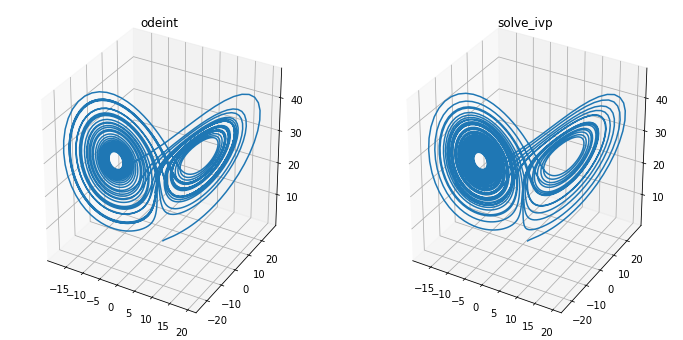

In [24]:
plt.figure(figsize=(12,6))
plt.subplot(121, projection='3d')
plt.plot(result_odeint[:, 0],
        result_odeint[:, 1],
        result_odeint[:, 2])
plt.title("odeint")
plt.subplot(122, projection='3d')

plt.plot(result_solve_ivp.y[0, :],
        result_solve_ivp.y[1, :],
        result_solve_ivp.y[2, :])
plt.title("solve_ivp")